**Importing all needed libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
url2='https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test'

In [ ]:
col_names=['Surgery','Age','Hosp No','Rectal Temp','pulse','respi val','temp ext','peripheral pulse','mucous membranes'
    ,'capillary refill time','pain','peristalsis','abdominal distension','nasogastric tubes','nasogastric reflux'
    ,'nasogastric reflux PH','rectal examination','abdomen','packed cell volume','total protein','abdominocentesis appearance'
    ,'abdomcentesis total protein','outcome','surgical lesion','type of lesion1','type of lesion2','type of lesion3','cp_data']

In [ ]:
df_train=pd.read_csv(url,sep=' ',names=col_names,na_values='?')
df_test=pd.read_csv(url2,sep=' ',names=col_names,na_values='?')

In [ ]:
df=pd.concat([df_train,df_test],axis=0)

In [ ]:
df.shape

(368, 28)

**The data is skewed as the dataset contains more instance of class one than two other**

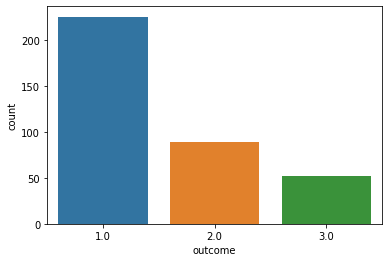

In [ ]:
sns.countplot(x='outcome',data=df)

**The features 'type of lesion2' & 'type of lesion3' are of no use as they contains nearly all the values from same class so we can drop them**

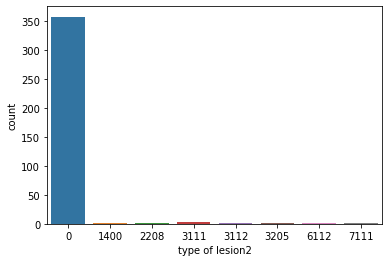

In [ ]:
sns.countplot(x='type of lesion2',data=df)

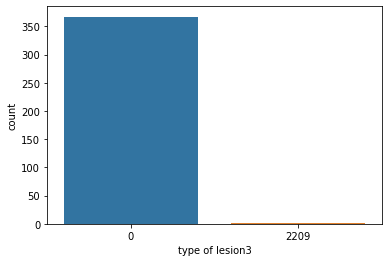

In [ ]:
sns.countplot(x='type of lesion3',data=df)

In [ ]:
df.describe()

,Surgery,Age,Hosp No,Rectal Temp,pulse,respi val,temp ext,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tubes,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion1,type of lesion2,type of lesion3,cp_data
count,366.000000,368.000000,3.680000e+02,299.000000,342.000000,297.000000,303.000000,285.000000,320.000000,330.000000,305.000000,316.000000,303.000000,237.000000,235.000000,69.000000,240.000000,225.000000,331.000000,325.000000,174.000000,133.000000,366.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,1.415301,1.608696,1.112334e+06,38.134448,70.757310,30.521886,2.356436,1.961404,2.834375,1.303030,2.908197,2.908228,2.224422,1.738397,1.608511,4.962319,2.779167,3.715556,45.656798,24.771077,2.045977,2.948120,1.527322,1.369565,3650.834239,96.972826,6.002717,1.663043
std,0.493448,2.123985,1.560122e+06,0.711684,28.089867,17.669651,1.041371,1.052454,1.591732,0.473289,1.304634,0.986156,1.059081,0.650230,0.811201,2.003901,1.246410,1.451286,10.865663,27.704880,0.803289,1.927064,0.731347,0.483344,5360.219154,640.506258,115.152085,0.473313
min,1.000000,1.000000,5.142790e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289152e+05,37.800000,48.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.500000,1.000000,3.000000,37.250000,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.302990e+05,38.100000,60.000000,28.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,5.400000,3.000000,4.000000,44.000000,7.500000,2.000000,2.100000,1.000000,1.000000,3025.000000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000,6.500000,4.000000,5.000000,52.000000,58.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,5.000000,4.000000,4.000000,3.000000,3.000000,8.500000,4.000000,5.000000,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [ ]:
df.head()

,Surgery,Age,Hosp No,Rectal Temp,pulse,respi val,temp ext,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tubes,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion1,type of lesion2,type of lesion3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [ ]:
df.shape

(368, 28)

In [ ]:
df.isnull().sum()

Surgery                          2
Age                              0
Hosp No                          0
Rectal Temp                     69
pulse                           26
respi val                       71
temp ext                        65
peripheral pulse                83
mucous membranes                48
capillary refill time           38
pain                            63
peristalsis                     52
abdominal distension            65
nasogastric tubes              131
nasogastric reflux             133
nasogastric reflux PH          299
rectal examination             128
abdomen                        143
packed cell volume              37
total protein                   43
abdominocentesis appearance    194
abdomcentesis total protein    235
outcome                          2
surgical lesion                  0
type of lesion1                  0
type of lesion2                  0
type of lesion3                  0
cp_data                          0
dtype: int64

**Dropping rows which have it's outcome as NaN values**

In [ ]:
df = df.dropna(axis=0, subset=['outcome'])

**Dividing the dataset into target feature and other features**

In [ ]:
Y=df['outcome']
X=df.drop(['outcome'],axis=1)

**Dropping the hospital number as it's irrelevant and dropping columns containing 40% or more null values**

In [ ]:
X=X.drop(['Hosp No','type of lesion2','type of lesion3'],axis=1)
X=X.dropna(axis=1,thresh=230)

**Dividing the dataset on the the basis whether the data is continuous or discrete**

In [ ]:
X_dist=X[['Surgery','Age','temp ext','peripheral pulse','mucous membranes','capillary refill time','pain','peristalsis'
                 ,'abdominal distension','nasogastric tubes','nasogastric reflux','rectal examination','surgical lesion','type of lesion1','cp_data']]
X_cont=X.drop(['Surgery','Age','temp ext','peripheral pulse','mucous membranes','capillary refill time','pain','peristalsis'
                 ,'abdominal distension','nasogastric tubes','nasogastric reflux','rectal examination','surgical lesion','type of lesion1','cp_data'],axis=1)

**Imputing the continuous data null values using mean as strategy**

In [ ]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
col_names=X_cont.columns

In [ ]:
X_cont=im.fit_transform(X_cont)

In [ ]:
X_cont=pd.DataFrame(X_cont,columns=col_names)

**Imputing the discrete data null values using median as strategy**

In [ ]:
im=SimpleImputer(missing_values=np.nan,strategy='median')

In [ ]:
col_names=X_dist.columns

In [ ]:
X_dist=im.fit_transform(X_dist)

In [ ]:
X_dist=pd.DataFrame(X_dist,columns=col_names)

In [ ]:
X_dist.head()

,Surgery,Age,temp ext,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tubes,nasogastric reflux,rectal examination,surgical lesion,type of lesion1,cp_data
0,2.0,1.0,3.0,3.0,3.0,2.0,5.0,4.0,4.0,2.0,1.0,3.0,2.0,11300.0,2.0
1,1.0,1.0,3.0,1.0,4.0,1.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,2208.0,2.0
2,2.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0
3,1.0,9.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,3.0,1.0,2208.0,1.0
4,2.0,1.0,3.0,1.0,6.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,4300.0,2.0


**standardizing the continous dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_cont=sc.fit_transform(X_cont)

In [ ]:
X_cont=pd.DataFrame(X_cont)

In [ ]:
X_cont.head()

,0,1,2,3,4
0,0.567897,-0.178736,-0.159101,-0.064445,-0.625272
1,1.658071,0.633502,-0.663098,0.420215,2.327211
2,0.256419,-1.138654,-0.411100,-1.227628,-0.690797
3,1.502332,3.439417,3.368882,0.226351,-0.671525
4,-1.300972,1.224221,0.281897,2.746580,-0.663816


In [ ]:
X=pd.concat([X_cont,X_dist],axis=1)

In [ ]:
X.shape

(366, 20)

**Correlation heatmap between different features**

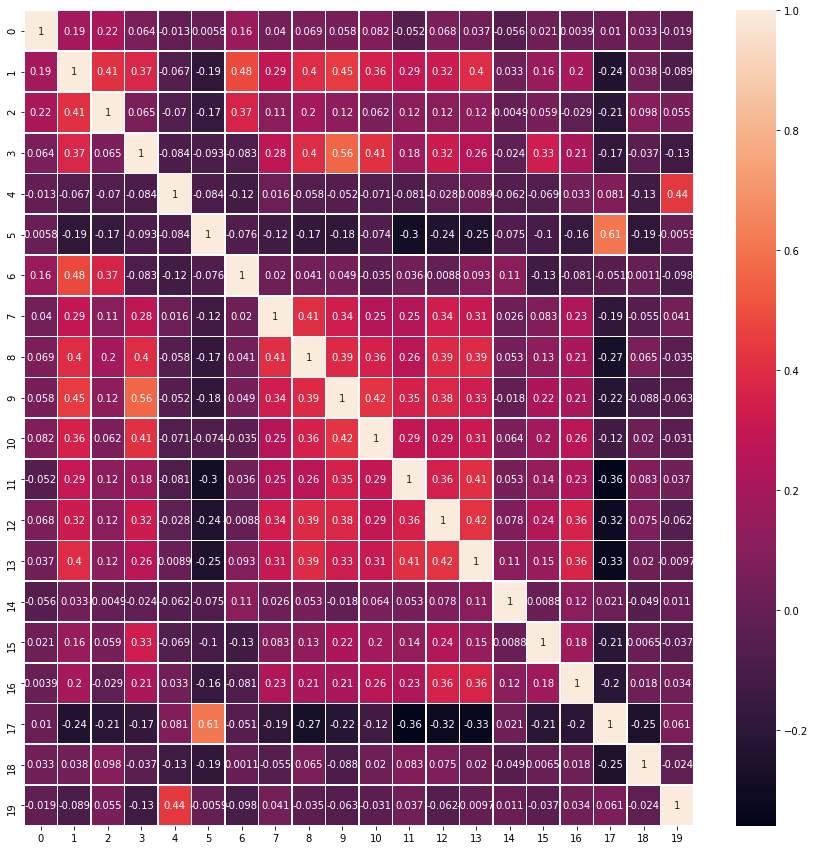

In [ ]:
corrcoef=np.corrcoef(X.T.values)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrcoef, annot=True,linewidths=.6, ax=ax)
plt.show()

In [ ]:
X.head()

,0,1,2,3,4,Surgery,Age,temp ext,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tubes,nasogastric reflux,rectal examination,surgical lesion,type of lesion1,cp_data
0,0.567897,-0.178736,-0.159101,-0.064445,-0.625272,2.0,1.0,3.0,3.0,3.0,2.0,5.0,4.0,4.0,2.0,1.0,3.0,2.0,11300.0,2.0
1,1.658071,0.633502,-0.663098,0.420215,2.327211,1.0,1.0,3.0,1.0,4.0,1.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,2208.0,2.0
2,0.256419,-1.138654,-0.411100,-1.227628,-0.690797,2.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0
3,1.502332,3.439417,3.368882,0.226351,-0.671525,1.0,9.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,3.0,1.0,2208.0,1.0
4,-1.300972,1.224221,0.281897,2.746580,-0.663816,2.0,1.0,3.0,1.0,6.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,4300.0,2.0


**kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid={'leaf_size':[1,2,5,10,15,20,25,30],
'n_neighbors':[1,5,10,15,20,25,30],
'p':[1,2]}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid, cv=cv,n_jobs=-1)

In [ ]:
grid.fit(X,Y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 5, 10, 15, 20, 25, 30],
                         'n_neighbors': [1, 5, 10, 15, 20, 25, 30],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)

{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}


In [ ]:
print(grid.cv_results_['mean_test_score'].mean())

0.6487219362219363


**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid = {'C': [0.1,1,5,10,20,24,25,30], 
              'gamma': [1,0.5, 0.1,0.05, 0.01,0.005, 0.001,0.0005, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
grid = GridSearchCV(SVC(), param_grid,cv=cv,n_jobs=-1, refit = True, verbose = 3)

In [ ]:
grid.fit(X,Y)

Fitting 30 folds for each of 72 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 924 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   24.4s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 20, 24, 25, 30],
                         'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001,
                                   0.0005, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}


In [ ]:
print(grid.cv_results_['mean_test_score'].mean())

0.6656997275052832


**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid={'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l2'],
'C' : [1,0.12,0.1,0.05, 0.01]}

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=150), param_grid,cv=cv,n_jobs=-1, refit = True, verbose = 3)

In [ ]:
grid.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   48.1s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=150, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.12, 0.1, 0.05, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
print(grid.cv_results_['mean_test_score'].mean())

0.6817600934267601


**XGBoost classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid={"learning_rate"    : [0.1,0.15] ,
 "max_depth"        : [ 2, 3, 4],
 "gamma"            : [0.4,0.5]}

In [ ]:
grid = GridSearchCV(XGBClassifier(), param_grid,cv=cv,n_jobs=-1, refit = True, verbose = 3)

In [ ]:
grid.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   30.4s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.4, 0.5], 'learning_rate': [0.1, 0.15],
                         '

In [ ]:
print(grid.best_params_)

{'gamma': 0.5, 'learning_rate': 0.15, 'max_depth': 3}


In [ ]:
print(grid.cv_results_['mean_test_score'].mean())

0.7273648648648648
